# Avances primera semana: usando datos de hub_data.txt

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de constantes

c = 299792 #km/s

M = -19.3 

H_0 = 72

Hasta ahora hemos usado dos tipos de datos: los de la Tabla 4 del paper "*A 6% measurement of the Hubble parameter at z~0.45: direct evicende of the epoch of cosmic re-acceleration*", cantidades que se pueden observar en los archivos texto **hub_data3.txt**, y datos de *Pantheon*, tales como las magnitudes aparentes de supernovas tipo Ia ($m_b$). 

Lo que logramos graficar es: 

1. $H(z)$ : parámetro de Hubble
2. $f(z) = \frac{H(z)}{(1+z)} = \dot{a}$ : derivada del factor de escala
3. $D_L(z)$ : distancia de luminosidad
4. $D_A(z)$ : distancia angular diametral
5. $m_b (z)$ : magnitud aparente de las supernova

Añadiendo su respectivo ajuste polinomial a traves de la función *np.polyfit()* y barras de error en la mayoría de los casos.

# Usando datos de Tabla 4

In [2]:
# Extracción de datos

columna1 = []
columna2 = []
columna3 = []

with open('c:/Users/ximen/Desktop/Practicas DFI/hub_data_3.txt', 'r') as archivo:
    # Lee cada línea del archivo
    for linea in archivo: #cada linea es una fila del texto
        elementos = linea.split() # divide la línea en sus elementos utilizando espacios como delimitadores
        #print(elementos)
        columna1.append(elementos[0]) # Agrega cada elemento a su respectiva columna
        columna2.append(elementos[1])
        columna3.append(elementos[2])

#print("z:", columna1)
#print("H(z):", columna2)
#print("Desviación estándar:", columna3)

z = np.zeros(len(columna1))
for i in range(len(columna1)):
  z[i] = float(columna1[i])

H = np.zeros(len(columna2))
for i in range(len(columna2)):
  H[i] = float(columna2[i])

desv = np.zeros(len(columna3))
for i in range(len(columna3)):
  desv[i] = float(columna3[i])

## Parámetro de Hubble: $H(z)$

Polinomio ajustado:        2
4.922 x + 59.87 x + 61.46


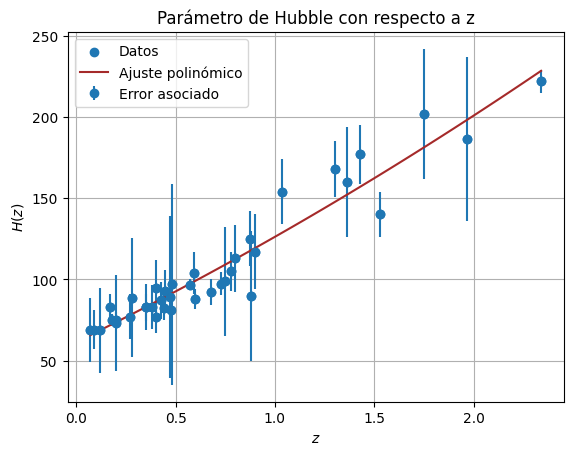

In [3]:
plt.errorbar(z, H, yerr=desv, fmt='o', label='Error asociado')
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.grid(True)
plt.title('Parámetro de Hubble con respecto a z')


# Ajuste Lineal

coeficientes = np.polyfit(z, H, 2)

polinomio = np.poly1d(coeficientes)

print("Polinomio ajustado:", polinomio)

z_ajuste = np.linspace(min(z), max(z), 100)
D_ajuste = polinomio(z_ajuste)

plt.scatter(z, H, label='Datos')
plt.plot(z_ajuste, D_ajuste, label='Ajuste polinómico', color='brown')
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.legend()
plt.show()


## Derivada de factor de escala: $f(z) = \frac{H(z)}{(1+z)} = \dot{a}$

En esta parte graficamos la función $f(z)$ con los datos ya mencionados. Para el ajuste polinómico tuvimos que separar los datos en dos, definiendo este punto de 'cambio' como z=0.5, valor similar a varios $z$ que definen la época en que el universo dejo de desacelerarse para empezar su fase de aceleración. Sabemos que este ajuste de los datos es ambiguo, por lo que pensamos cambiarlo a posterior. De todas maneras, se observa que hay cierto valor de $z$ donde la función cambia el signo de su derivada, tal que: 

1. $\ddot{a}<0$ : desaceleración
2. $\ddot{a}>0$ : aceleración

Polinomio ajustado:  
-10.64 x + 65.6


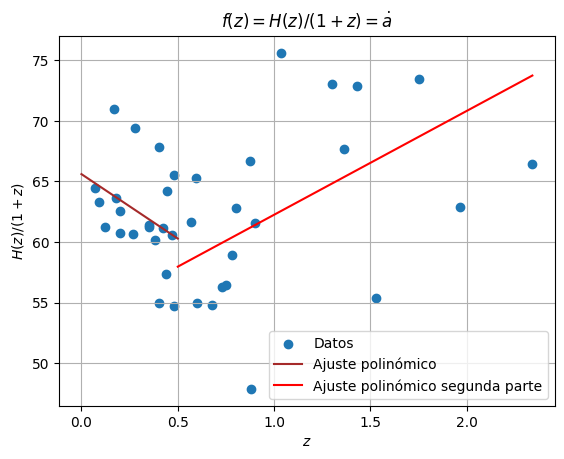

In [4]:
f = H/(1+z)

#Ajuste lineal: se hizo por partes

coeficientes_f = np.polyfit(z[0:20], f[0:20], 1)
coeficientes_f2 = np.polyfit(z[21:-1], f[21:-1], 1)

polinomio_f = np.poly1d(coeficientes_f)
polinomio_f2 = np.poly1d(coeficientes_f2)

print("Polinomio ajustado:", polinomio_f)

z_ajuste_f = np.linspace(0, 0.5, 100)
z_ajuste_f2 = np.linspace(0.5, max(z), 100)

f_ajuste = polinomio_f(z_ajuste_f)
f_ajuste_2 = polinomio_f2(z_ajuste_f2)

plt.scatter(z, f, label='Datos')
plt.plot(z_ajuste_f, f_ajuste, label='Ajuste polinómico', color='brown')
plt.plot(z_ajuste_f2, f_ajuste_2, label='Ajuste polinómico segunda parte', color='red')
plt.xlabel('$z$')
plt.ylabel('$H(z)/(1+z)$')
plt.title('$f(z) = H(z)/(1+z) = \dot{a}$')
plt.legend()
plt.grid(True)
plt.show()

## D(z) a partir de la integral

Usando: 

$$D_L(z) = c\frac{1+z}{H_0}\int_0^z \frac{dz}{E(z)}$$


Para cada $z$ calculamos la integral de 0 hasta ese $z$. Por lo tanto, los valores de las integrales se van sumando. Se usó el método de los trapecios(*) tal que para cada intervalo de $[0, z]$ se calculó: 

$$\int_0^z \frac{dz}{E(z)} = \frac{(z - 0)(E(z)^{-1} + E(0)^{-1})}{2} $$

Definiendo las siguientes cantidades: 

1. $H_0 = 72$
2. $c = 3 \cdot 10^5$ km/s  

(*)nota: también traté de solo sumar rectángulos, y ambos métodos cambian la forma de la función. Mientras que los trapecios dan como resultado una función de forma más 'lineal', los rectángulos le añaden apariencia 'exponencial'. Por lo tanto, ambos se ajustan a modelos del universo donde hay energía oscura. 

Polinomio ajustado:  
8935 x - 1376


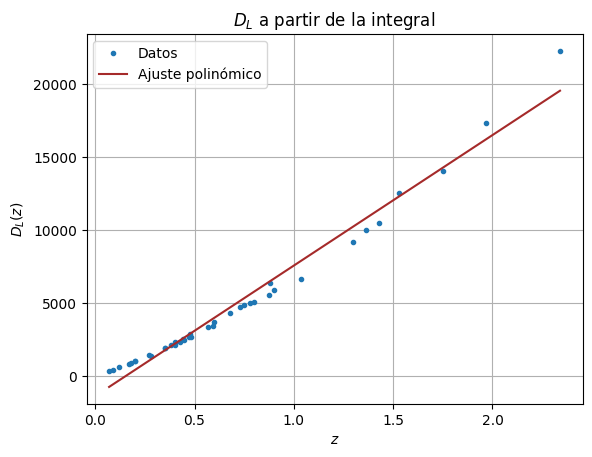

In [5]:
E = np.zeros(len(H))
integral = np.zeros(len(H))

for i in range(len(H)): 
    E[i] = H[i]/H_0

for i in range(len(H)):
    integral[i] = (z[i] - 0)*(1/E[i] + 1/E[0]) / 2


D_LH = np.zeros(len(H))

for i in range(len(H)):
    D_LH[i] = c*((1+z[i])/H_0)*integral[i]

# Ajuste Lineal

coeficientes_ = np.polyfit(z, D_LH, 1)



polinomio_ = np.poly1d(coeficientes_)

print("Polinomio ajustado:", polinomio_)

# Genera puntos para la curva ajustada
z_ajuste_ = np.linspace(min(z), max(z), 100)
D_LH_ajuste = polinomio_(z_ajuste_)

plt.plot(z, D_LH, '.', label = "Datos")
plt.plot(z_ajuste_, D_LH_ajuste, label='Ajuste polinómico', color='brown')
plt.xlabel('$z$')
plt.ylabel('$D_L(z)$')
plt.title('$D_L$ a partir de la integral')
plt.legend()
plt.grid(True)
plt.show()


## Cálculo de $d_A$ a partir de $d_L$

Siguiendo la relación: 

$$d_A = \frac{d_L}{(1+z)^2}$$

Tenemos gráficos en bibliografía que pueden ser comparados con este. En tales se grafica $(H_0/c)d_A$ v/s $z$. 

Polinomio ajustado:           4          3          2
-0.05814 x + 0.3681 x - 0.8641 x + 0.954 x + 0.005598


Text(0.5, 1.0, 'Diametral Angular Distance ($D_A$) v/s z')

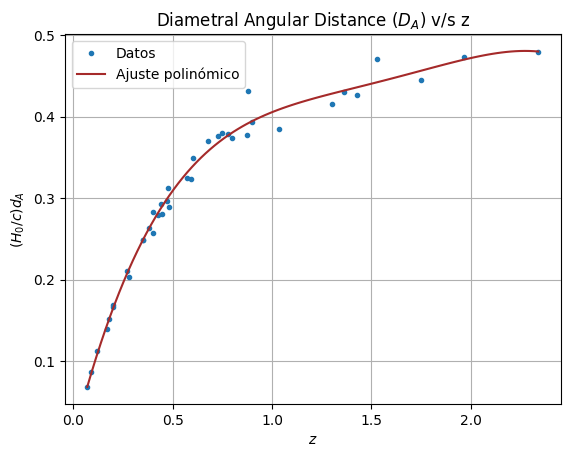

In [6]:
d_A = D_LH / ((1+z)**2)

# Ajuste Lineal con función np.polyfit
coeficientes_da = np.polyfit(z, (H_0/c)*d_A, 4)
polinomio_da = np.poly1d(coeficientes_da)
print("Polinomio ajustado:", polinomio_da)

z_ajuste_a = np.linspace(min(z), max(z), 100)
da_ajuste = polinomio_da(z_ajuste_a)

plt.plot(z, (H_0/c)*d_A, '.', label = 'Datos')
plt.plot(z_ajuste_a, da_ajuste, label='Ajuste polinómico', color='brown')
plt.xlabel('$z$')
plt.ylabel('$(H_0/c)d_A$')
plt.legend()
plt.grid(True)
plt.title('Diametral Angular Distance ($D_A$) v/s z')


## Cálculo de $H_0$ a partir de gráfico de $D_L$ v/s $zc$

Debería ser su amplitud cuando $\lim{{z \to 0}}$, por lo que se toman pocos datos. 

(*) Falta confirmar si es amplitud o pendiente. 

Polinomio ajustado:  
0.01822 x - 83.52
H_0 = 0.018


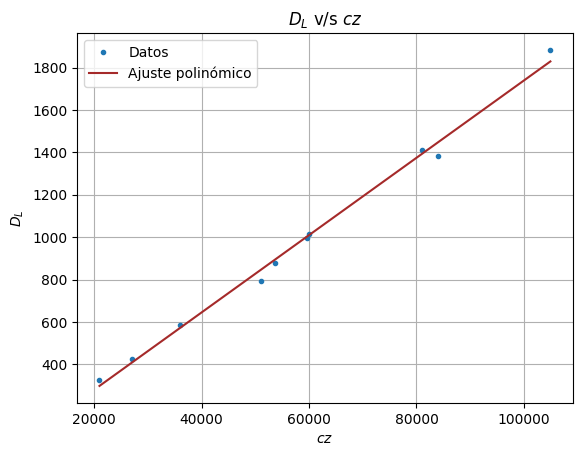

In [7]:
# Ajuste Lineal con función np.polyfit
coeficientes_0 = np.polyfit(z[0:10]*c, D_LH[0:10], 1)
polinomio_0 = np.poly1d(coeficientes_0)
print("Polinomio ajustado:", polinomio_0)
print('H_0 = 0.018')

z_ajuste_0 = np.linspace(min(z[0:10]*c), max(z[0:10]*c), 100)
h0_ajuste = polinomio_0(z_ajuste_0)

plt.plot(z[0:10]*c, D_LH[0:10], '.', label = 'Datos')
plt.plot(z_ajuste_0, h0_ajuste, label='Ajuste polinómico', color='brown')
plt.title('$D_L$ v/s $cz$')
plt.xlabel('$cz$')
plt.ylabel('$D_L$')
plt.legend()
plt.grid(True)
plt.show()

# Progreso semana 2

**Objetivo:** Encontrar funciones teóricas para $H(z)$, $D_L(z)$ y $D_A(z)$, y empezar con algoritmo genético. 

## Funciones teóricas: 

$$H(z) = H_0 \left[\sum_{i} \Omega_{0, i}(1+z)^{3(1+ \omega)}\right]^{\frac{1}{2}}$$

Más generalmente en nuestro universo la ecuación puede tomar la forma: 

$$H(z) = H_0 \left[\Omega_{r, 0}(1+z)^{4} + \Omega_{m, 0}(1+z)^{3} + \Omega_{DE, 0}(1+z)^{3(1+\omega_{DE})} + (1 - \Omega_0)(1+z)^{2} \right]^{\frac{1}{2}}$$


Que cambia de forma dependiendo de la curvatura del universo. Siendo $\Omega_{0} = \Omega_{r, 0} + \Omega_{m, 0} + \Omega_{\Lambda, 0}$, esta cantidad puede tomar los siguientes valores: 

1. Universo plano: $\Omega_{0} = 1$ y $K = 0$. 
2. Universo cerrado: $\Omega_{0} > 1$ y $ K = 1$.
3. Universo abierto: $\Omega_{0} < 1$ y $K = -1$.


In [8]:
def H_bm(z, Omega_r, Omega_m, Omega_lambda, omega_DE, Omega_0): 
    return H_0*np.sqrt((Omega_r*(1+z)**(3*(1 + 1/3)) + Omega_m*(1+z)**3 + Omega_lambda*(1+z)**(3*(1+omega_DE)) + (1-Omega_0)*(1+z)**2))

## Benchmark Model

Este describe un universo **plano** tal que: 

1. $\Omega_0 = 1$
2. $\Omega_{DE, 0} = \Omega_{\Lambda, 0}$ con $\omega = -1$.
3. $\Omega_{\gamma, 0} + \Omega_{\nu, 0} = \Omega_{r, 0} \approx 8.4\cdot 10^{-5}$
4. $\Omega_{bary, 0} + \Omega_{dm, 0} = \Omega_{m ,0 } \approx 0.3$
5. $\Omega_{\Lambda, 0} \approx 0.7$
6. $H_0 \approx 70$

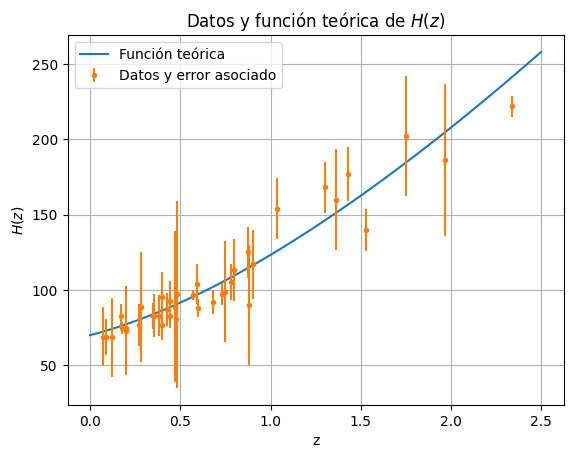

In [9]:
# Para Benchmark Model
H_0 = 70
O_r = 8.4*10**(-5)
O_m = 0.3
O_lambda = 0.7
o_DE = -1
O_0 = 1

# Se crea un arreglo de z para la función teórica
z_bu = np.linspace(0, 2.5)

# hub_data_3.txt
H_teorico = H_bm(z_bu,O_r, O_m, O_lambda, o_DE, O_0)

plt.plot(z_bu, H_teorico, label = 'Función teórica')
plt.errorbar(z, H, yerr=desv, fmt='.', label='Datos y error asociado')
plt.grid(True)
plt.title('Datos y función teórica de $H(z)$')
plt.xlabel('z')
plt.ylabel('$H(z)$')
plt.legend()
plt.show()

## Distancia de Luminosidad

Se calcula a partir de: 

$$D_L(z) = c\frac{(1+z)}{H_0} \int_0^z \frac{H_0}{H(z)} dz = c\frac{(1+z)}{H_0} \int_0^z \left[\sum_{i} \Omega_{0, i}(1+z)^{3(1+ \omega)}\right]^{\frac{-1}{2}} dz$$

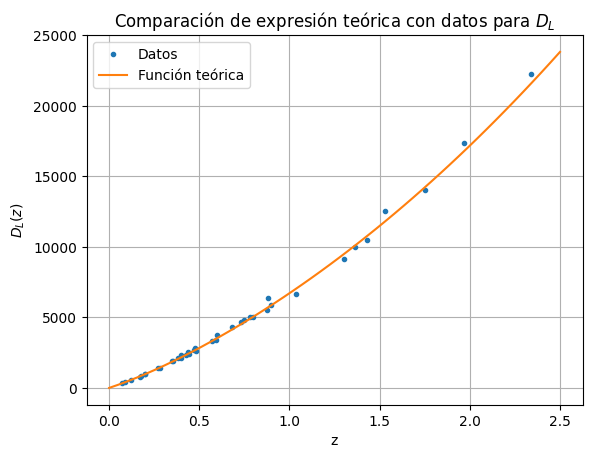

In [10]:
# Distancia de luminosidad

E_bm = np.zeros(len(H_teorico))
integral_bm = np.zeros(len(H_teorico))

for i in range(len(H_teorico)): 
    E_bm[i] = H_teorico[i]/H_0

for i in range(len(H_teorico)):
    integral_bm[i] = (z_bu[i] - 0)*(1/E_bm[i] + 1/E_bm[0]) / 2

D_Lbm = c*(1+z_bu)/H_0 * integral_bm

plt.plot(z, D_LH, '.', label = 'Datos')
plt.plot(z_bu, D_Lbm, label = 'Función teórica')
plt.xlabel('z')
plt.ylabel('$D_L(z)$')
plt.title('Comparación de expresión teórica con datos para $D_L$')
plt.legend()
plt.grid(True)
plt.show()


## Distancia Angular Diametral

Se calcula a partir de: 

$$D_A = (1+z)^{-2}D_L$$

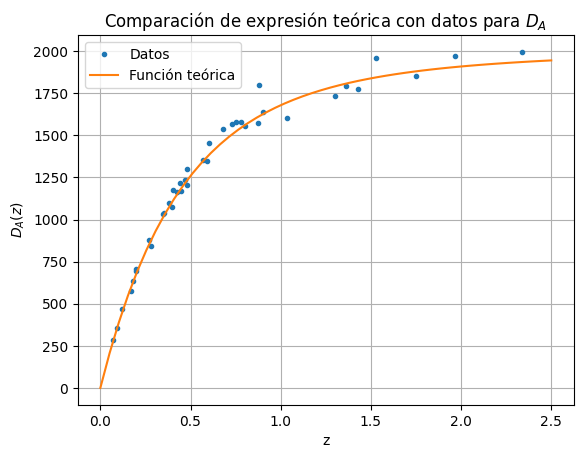

In [11]:
D_Abm = D_Lbm*((1+z_bu)**(-2))

plt.plot(z, d_A, '.', label = 'Datos')
plt.plot(z_bu, D_Abm, label = 'Función teórica')
plt.xlabel('z')
plt.ylabel('$D_A(z)$')
plt.title('Comparación de expresión teórica con datos para $D_A$')
plt.legend()
plt.grid(True)
plt.show()